<a href="https://colab.research.google.com/github/hublun/TWSApi/blob/master/IBApi_Historical_Data20201122_20201127.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_pickle('/content/drive/MyDrive/TWS/M2K_20201122_to_20201127162500.pkl')

In [38]:
df["Time"] = pd.to_datetime(df["time"], format='%Y%m%d  %H:%M:%S', yearfirst=True)

In [39]:
df.drop('time', axis=1, inplace=True)

In [40]:
df["Hour"] = pd.DatetimeIndex(df["Time"]).hour
df["Minute"] = pd.DatetimeIndex(df["Time"]).minute
df["Second"] = pd.DatetimeIndex(df["Time"]).second
df["Day"] = pd.DatetimeIndex(df["Time"]).day

In [41]:
initialDateTime = df.Time[0]
initialDateTime

Timestamp('2020-11-22 18:00:00')

In [42]:
df["TradeDay"] = pd.TimedeltaIndex(df.Time - initialDateTime).days

In [21]:
df.head()

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay
0,1782.3,1782.8,1778.1,1779.4,1780.21,106,2020-11-22 18:00:00,18,0,0,22,0
1,1779.8,1779.9,1777.1,1777.9,1778.27,60,2020-11-22 18:01:00,18,1,0,22,0
2,1778.0,1779.0,1776.7,1778.7,1777.52,44,2020-11-22 18:02:00,18,2,0,22,0
3,1778.5,1779.2,1778.5,1778.9,1778.85,27,2020-11-22 18:03:00,18,3,0,22,0
4,1778.8,1779.5,1778.4,1779.2,1778.95,40,2020-11-22 18:04:00,18,4,0,22,0


In [43]:

df["pbmin"] = (df.avg - df.avg.shift(periods=1)).fillna(0.0)
#df["pdiffmin"] = (df.avg - df.avg.shift(periods=12)).fillna(0.0)
df["pb5min"] = (df.avg - df.avg.shift(periods=5)).fillna(0.0)
df["pb10min"] = (df.avg - df.avg.shift(periods=10)).fillna(0.0)
df["pb15min"] = (df.avg - df.avg.shift(periods=15)).fillna(0.0)
df["pb30min"] = (df.avg - df.avg.shift(periods=30)).fillna(0.0)
df["pbhr"] = (df.avg - df.avg.shift(periods=60)).fillna(0.0)
df.head()

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay,pbmin,pb5min,pb10min,pb15min,pb30min,pbhr
0,1782.3,1782.8,1778.1,1779.4,1780.21,106,2020-11-22 18:00:00,18,0,0,22,0,0.00,0.0,0.0,0.0,0.0,0.0
1,1779.8,1779.9,1777.1,1777.9,1778.27,60,2020-11-22 18:01:00,18,1,0,22,0,-1.94,0.0,0.0,0.0,0.0,0.0
2,1778.0,1779.0,1776.7,1778.7,1777.52,44,2020-11-22 18:02:00,18,2,0,22,0,-0.75,0.0,0.0,0.0,0.0,0.0
3,1778.5,1779.2,1778.5,1778.9,1778.85,27,2020-11-22 18:03:00,18,3,0,22,0,1.33,0.0,0.0,0.0,0.0,0.0
4,1778.8,1779.5,1778.4,1779.2,1778.95,40,2020-11-22 18:04:00,18,4,0,22,0,0.10,0.0,0.0,0.0,0.0,0.0


In [44]:
df["pfmin"] = (df.avg.shift(-1)-df.avg).fillna(0.0)
df["pf5min"] = (df.avg.shift(-5)-df.avg).fillna(0.0)
df["pf10min"] = (df.avg.shift(-10)-df.avg).fillna(0.0)
df["pf15min"] = (df.avg.shift(-15)-df.avg).fillna(0.0)
df.tail()

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay,pbmin,pb5min,pb10min,pb15min,pb30min,pbhr,pfmin,pf5min,pf10min,pf15min
6385,1854.0,1854.1,1852.3,1852.3,1853.16,43,2020-11-27 13:10:00,13,10,0,27,4,-0.78,0.58,-0.37,1.27,3.42,3.75,-1.15,0.0,0.0,0.0
6386,1852.3,1852.3,1851.7,1852.1,1852.01,39,2020-11-27 13:11:00,13,11,0,27,4,-1.15,-1.32,-1.47,0.62,2.19,2.89,0.36,0.0,0.0,0.0
6387,1852.1,1852.7,1852.1,1852.5,1852.37,12,2020-11-27 13:12:00,13,12,0,27,4,0.36,-1.45,-1.15,0.47,3.00,3.64,0.02,0.0,0.0,0.0
6388,1852.1,1854.0,1852.0,1853.9,1852.39,22,2020-11-27 13:13:00,13,13,0,27,4,0.02,-0.93,-0.88,0.03,2.99,4.18,2.73,0.0,0.0,0.0
6389,1852.8,1857.9,1852.8,1854.2,1855.12,135,2020-11-27 13:14:00,13,14,0,27,4,2.73,1.18,2.60,1.91,5.89,6.22,0.00,0.0,0.0,0.0


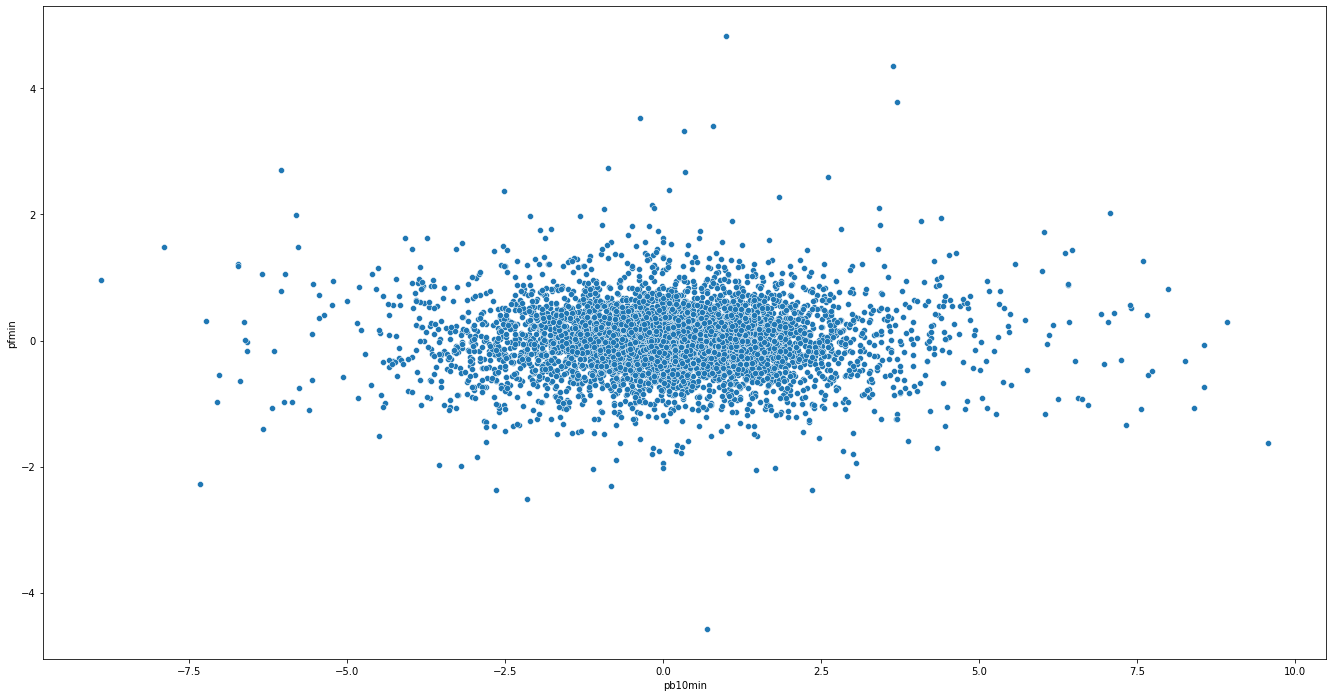

In [45]:
a4_dims = (23,12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(x=df.pb10min, y=df.pfmin)

In [46]:
df.columns[12:22]

Index(['pbmin', 'pb5min', 'pb10min', 'pb15min', 'pb30min', 'pbhr', 'pfmin',
       'pf5min', 'pf10min', 'pf15min'],
      dtype='object')

In [47]:
df.shape[0]

6390

In [62]:
df_corr = df[df.columns[11:22]]
df_corr.drop(df_corr.head(60).index, inplace=True)
df_corr.drop(df_corr.tail(15).index, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [63]:
df_corr.head()

,TradeDay,pbmin,pb5min,pb10min,pb15min,pb30min,pbhr,pfmin,pf5min,pf10min,pf15min
60,0,-0.11,0.63,0.99,2.22,2.81,5.61,-0.27,0.09,0.93,1.93
61,0,-0.27,0.08,0.70,1.53,1.97,7.28,0.23,0.81,1.49,2.32
62,0,0.23,0.19,0.71,1.12,2.28,8.26,-0.26,0.08,0.87,2.61
63,0,-0.26,-0.04,-0.45,0.31,3.11,6.67,-0.18,0.02,1.58,2.70
64,0,-0.18,-0.59,-0.71,0.24,3.71,6.39,0.57,1.06,2.70,3.57


In [64]:
df_corr.corr()

,TradeDay,pbmin,pb5min,pb10min,pb15min,pb30min,pbhr,pfmin,pf5min,pf10min,pf15min
TradeDay,1.000000,-0.015834,-0.034963,-0.050995,-0.064970,-0.098125,-0.148226,-0.016574,-0.034944,-0.050865,-0.063678
pbmin,-0.015834,1.000000,0.433580,0.309035,0.253459,0.175363,0.118028,0.116465,0.010485,-0.001071,-0.001051
pb5min,-0.034963,0.433580,1.000000,0.692876,0.563820,0.394036,0.265621,0.010688,-0.040459,-0.039362,-0.020342
pb10min,-0.050995,0.309035,0.692876,1.000000,0.802964,0.566035,0.374181,-0.001093,-0.039524,-0.025446,-0.016663
pb15min,-0.064970,0.253459,0.563820,0.802964,1.000000,0.699134,0.459415,-0.001012,-0.020651,-0.016270,-0.021449
pb30min,-0.098125,0.175363,0.394036,0.566035,0.699134,1.000000,0.665805,-0.006090,-0.040964,-0.053970,-0.070559
pbhr,-0.148226,0.118028,0.265621,0.374181,0.459415,0.665805,1.000000,-0.018412,-0.057118,-0.071332,-0.084327
pfmin,-0.016574,0.116465,0.010688,-0.001093,-0.001012,-0.006090,-0.018412,1.000000,0.433341,0.308832,0.252862
pf5min,-0.034944,0.010485,-0.040459,-0.039524,-0.020651,-0.040964,-0.057118,0.433341,1.000000,0.692551,0.563732
pf10min,-0.050865,-0.001071,-0.039362,-0.025446,-0.016270,-0.053970,-0.071332,0.308832,0.692551,1.000000,0.802738


In [ ]:
stat.pearsonr(df_corr.pdiff, df_corr.pdiff60)

(0.28458114908657434, 0.0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


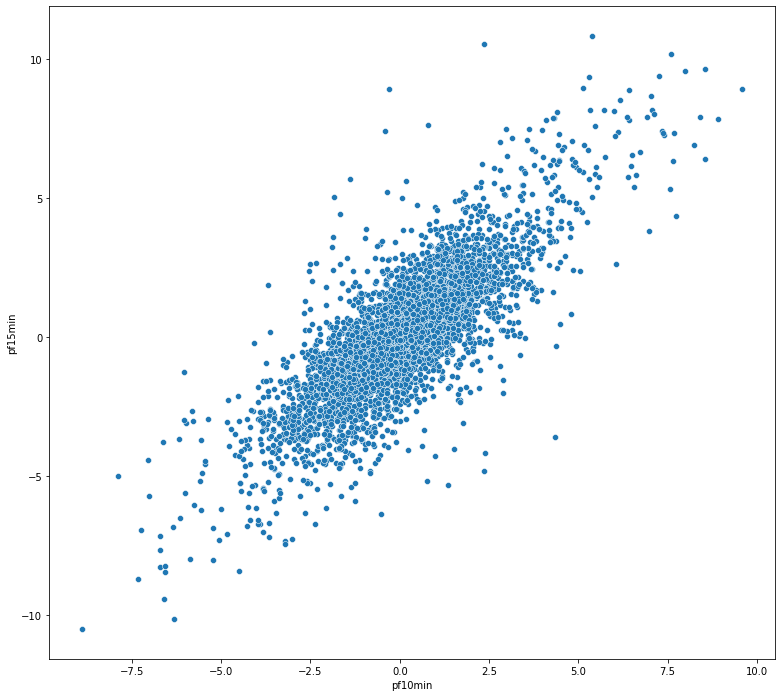

In [52]:
a4_dims = (13,12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(df_corr.pf10min, df.pf15min)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


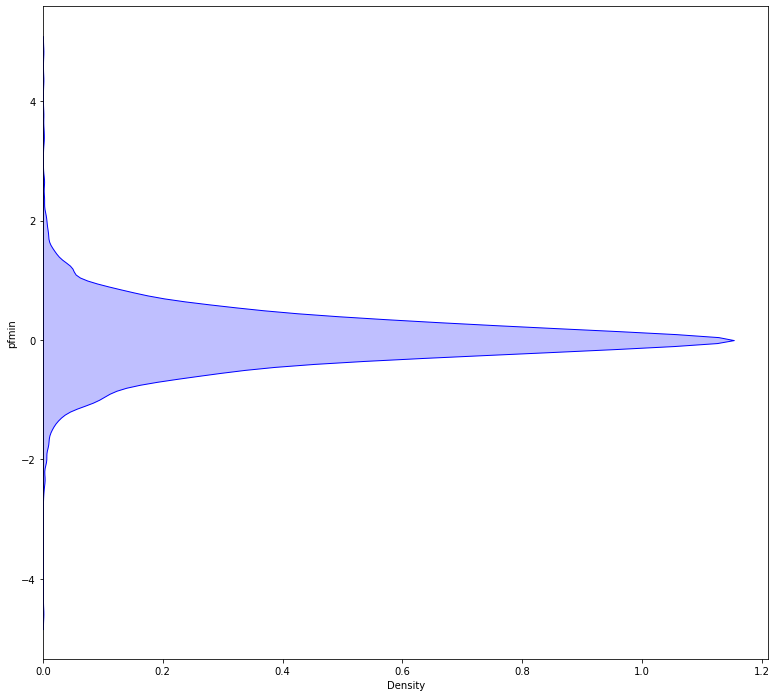

In [56]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(df_corr.pfmin, shade=True, vertical=True, color="blue")
#sns.histplot(df.pfmin)

In [59]:
"{0:.2f}%".format(100*df.pfmin[ abs(df.pfmin)< 1].shape[0]/df.shape[0])

'94.24%'

In [ ]:
"{0:.2f}%".format(100*df.pdiffmin[ abs(df.pdiff5min)< 1].shape[0]/df.shape[0])

'70.58%'

In [ ]:
"{0:.2f}%".format(100*df.pdiff10min[ abs(df.pdiff10min)< 1].shape[0]/df.shape[0])

'56.79%'

In [ ]:
"{0:.2f}%".format(100*df.pdiff15min[ abs(df.pdiff15min)< 1].shape[0]/df.shape[0])

'50.44%'

In [ ]:
"{0:.2f}%".format(100*df.pdiff30min[ abs(df.pdiff30min)< 1].shape[0]/df.shape[0])

'36.49%'

In [ ]:
"{0:.2f}%".format(100*df.pdiffhr[ abs(df.pdiffhr)< 1].shape[0]/df.shape[0])

'25.31%'

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


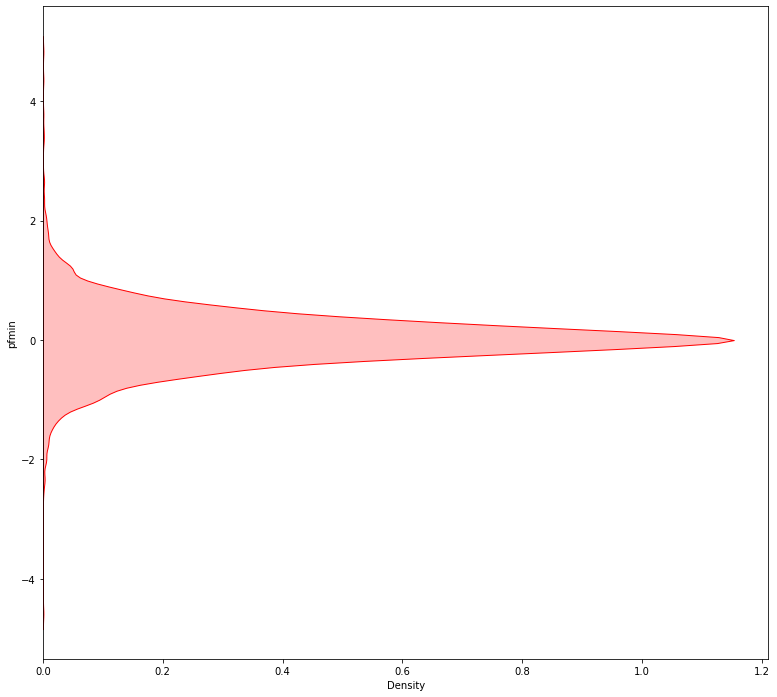

In [67]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(df_corr.pfmin, shade=True, vertical=True, color="red")